# [중량 제한](https://www.acmicpc.net/problem/1939)

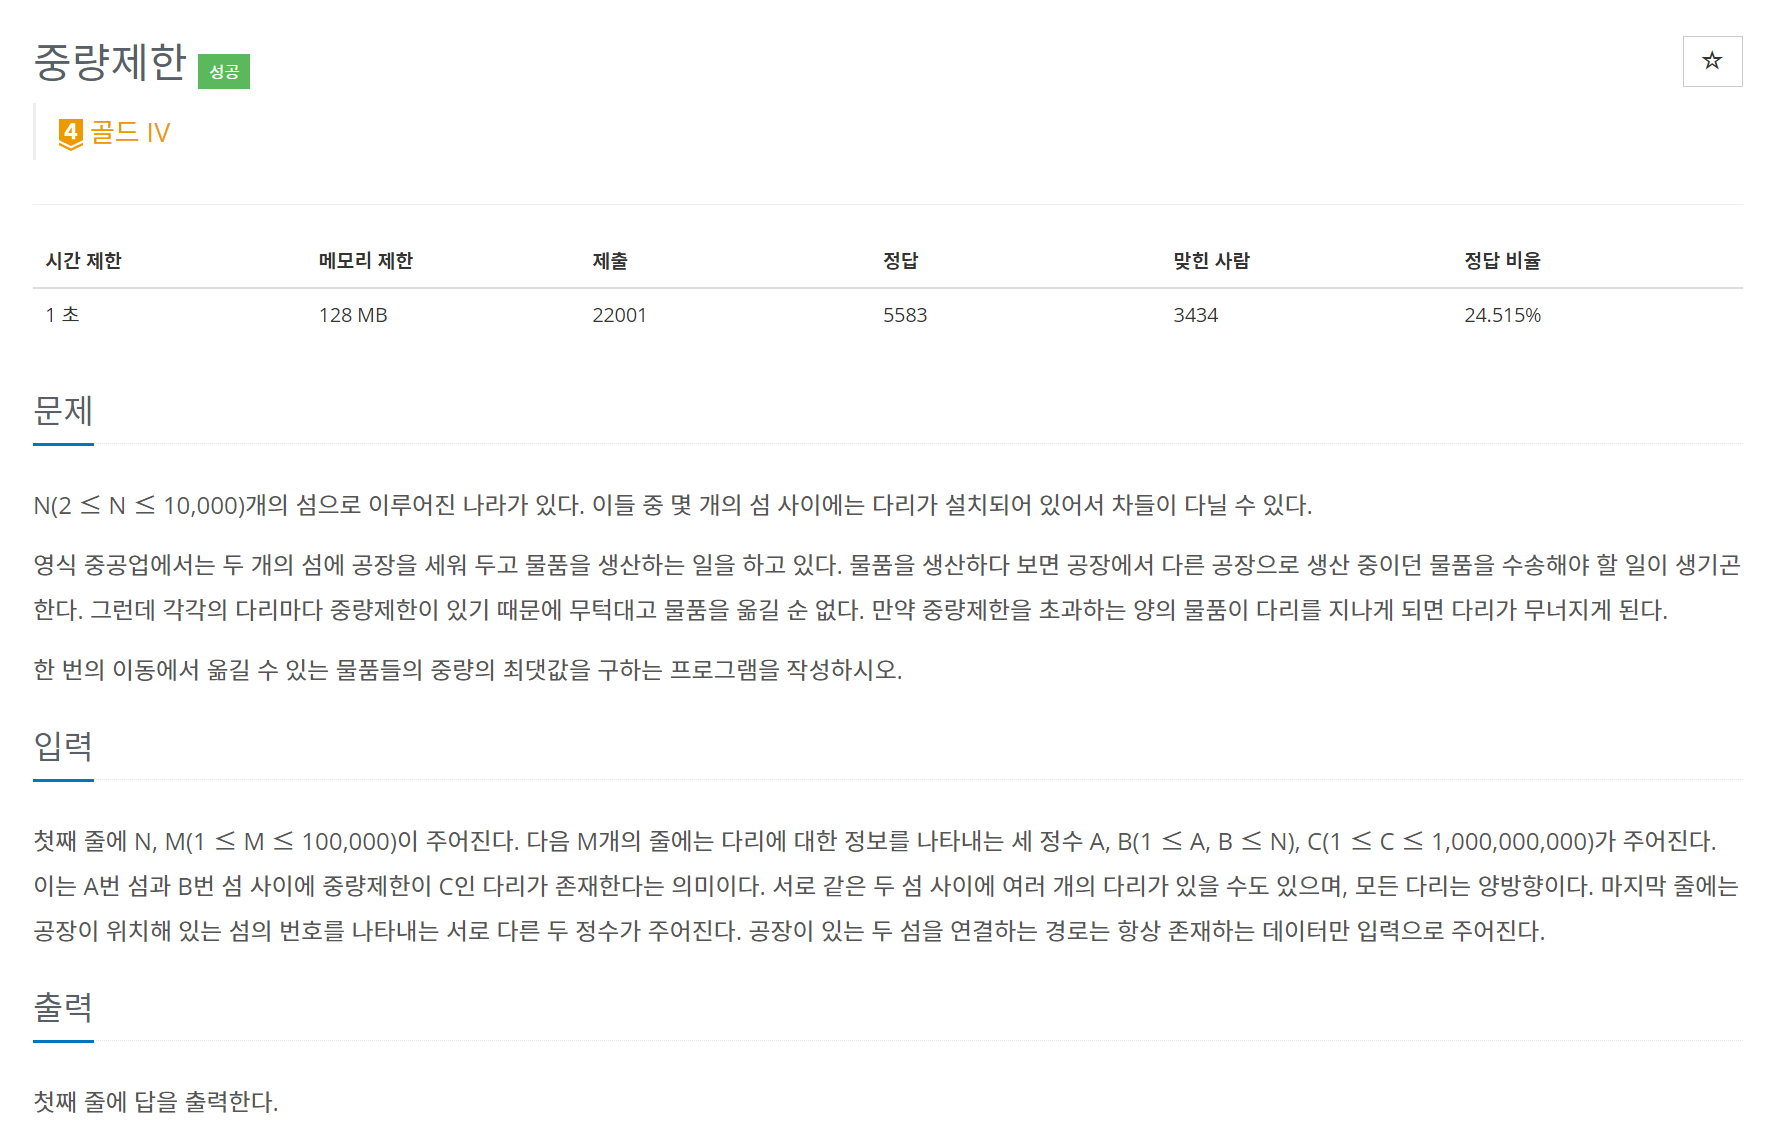

# 이 문제는 다양한 풀이가 가능한 문제
### ex. 이분탐색, 다익스트라, 유니온 파인드

나는 다익스트라로 만들었다.

<!-- ![](image/1939.png) -->

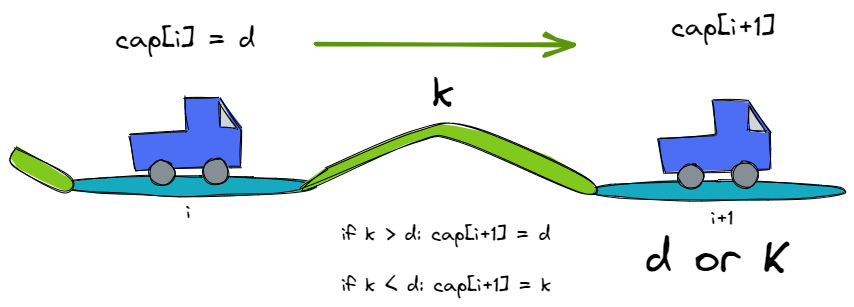

In [ ]:
import heapq
import sys

input = sys.stdin.readline

N, M = map(int, input().split())
arr = [dict() for _ in range(N+1)] # 경로 중 다리의 중량제한이 가장 큰 것 하나만 남긴다.

for _ in range(M):
    a, b, c = map(int, input().split())
    arr[a][b] = max(arr[a].get(b, 0), arr[b].get(a, 0), c)
    arr[b][a] = arr[a][b]

cap = [-1]*(N+1)
A, B = map(int, input().split())
h = []
heapq.heappush(h, (-(int(1e9)+1, A)))

while h:
    c, n = heapq.heappop(h)
    c = -c
    if cap[n] > c: # n 도시까지 오는 데 더 작은 중량제한이면 볼 필요 없다.
        continue
    for i in arr[n]:
        t = min(arr[n][i], c) # 더 작은 중량제한 선택해야 i도시까지 갈 때 다리가 무너지지 않는다.
        if cap[i] < t: # i까지 도착할 수 있는 중량 중 더 큰 중량 선택
            cap[i] = t
            heapq.heappush(h, (-t, i))
    '''
    아래의 주석 부분 코드가 들어가면 틀린다. 
    왜냐하면 처음으로 도착한 코드는 지금까지 최대의 중량값을 보장하지만 B까지는 가는데 최대값을 보장하지는 않는다.
    ex. A -3-> C -1-> B vs A -2-> C -2-> B 의 두 가지 경로에 있을 때 C에서 출력을 해버리면 정답은 2지만 1을 출력한다. 
    #     if i == B:
    #         print(cap[i])
    #         break
    # else:
    #     continue
    # break
    '''

print(cap[B])


## 다른 풀이로도 풀어보면 좋을 문제